# Vis√£o Computacional

A vis√£o computacional √© um campo da intelig√™ncia artificial que capacita computadores a interpretar e processar informa√ß√µes visuais do mundo. As aplica√ß√µes incluem reconhecimento de imagens, detec√ß√£o de objetos, rastreamento de movimento, etc. Para trabalhar com vis√£o computacional, usaremos bibliotecas populares como `numpy` e `cv2`.

### Importando Bibliotecas
Para come√ßar, vamos importar as bibliotecas necess√°rias: numpy para manipula√ß√£o de matrizes e matplotlib para visualiza√ß√£o.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
# Definindo uma fun√ß√£o auxiliar para exibir imagens
def show_image(img, title='Image', cmap_type='gray', figsize=(4, 4), vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap_type, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Caso a pasta 'data' n√£o exista, crie-a e fa√ßa o download da imagem
import os

os.makedirs('data', exist_ok=True)
!curl -o data/lenna.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  462k  100  462k    0     0   922k      0 --:--:-- --:--:-- --:--:--  923k


### Criando uma Imagem
Em vis√£o computacional, uma imagem √© representada como uma matriz de pixels. Cada pixel tem um valor de intensidade. Para imagens em escala de cinza, o valor varia de 0 a 255, onde 0 representa preto, 255 representa branco e os valores intermedi√°rios representam diferentes tons de cinza. Vamos criar uma imagem preta de 100x100 pixels. Cada pixel tem um valor de intensidade de 0.

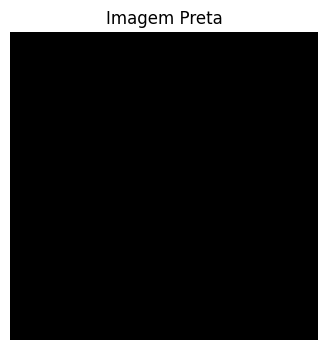

In [ ]:
black_image = np.zeros((100, 100), dtype=np.uint8)

show_image(black_image, title='Imagem Preta')

### Desenhando um Ponto
Para desenhar um ponto em uma imagem, precisamos modificar o valor de intensidade de um pixel espec√≠fico. As coordenadas dos pixels s√£o representadas por (y, x), onde y √© a linha e x √© a coluna. Vamos desenhar um ponto branco (intensidade 255) no centro da imagem preta.

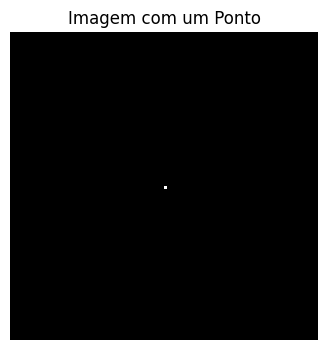

In [ ]:
black_image[50, 50] = 255

show_image(black_image, title='Imagem com um Ponto')

### Desenhando um Ret√¢ngulo
Para desenhar um ret√¢ngulo, precisamos modificar os valores de intensidade de um conjunto de pixels que formam a forma desejada. Vamos desenhar um ret√¢ngulo branco na imagem preta. O ret√¢ngulo ter√° coordenadas de (25, 40) a (75, 60).

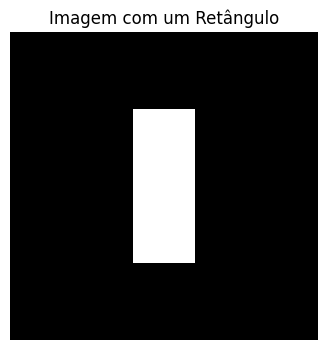

In [ ]:
rectangle_image = np.zeros((100, 100), dtype=np.uint8)

for y in range(25, 75):
    for x in range(40, 60):
        rectangle_image[y, x] = 255

show_image(rectangle_image, title='Imagem com um Ret√¢ngulo')

### Desenhando um C√≠rculo
Para desenhar um c√≠rculo, precisamos modificar os valores de intensidade dos pixels que est√£o dentro de uma determinada dist√¢ncia (raio) de um ponto central. Vamos desenhar um c√≠rculo branco com centro em (50, 50) e raio de 25 pixels.

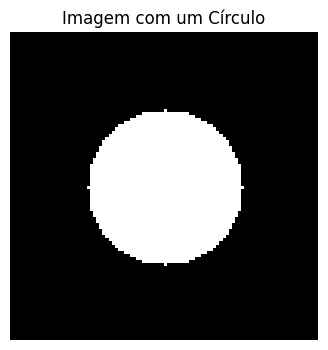

In [ ]:
circle_image = np.zeros((100, 100), dtype=np.uint8)
center = (50, 50)
radius = 25

for y in range(100):
    for x in range(100):
        dist = (x - center[0])**2 + (y - center[1])**2
        if dist <= radius**2:
            circle_image[y, x] = 255

show_image(circle_image, title='Imagem com um C√≠rculo')

### Criando um Gradiente
Um gradiente √© uma transi√ß√£o suave de uma cor para outra. Vamos criar uma imagem com um gradiente horizontal de cor, indo do preto ao branco. O valor de cada pixel ser√° interpolado entre as cores inicial e final.

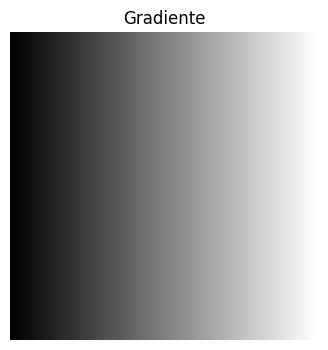

In [ ]:
def create_gradient(width, height, start_color, end_color):
    gradient_image = np.zeros((height, width), dtype=np.uint8)

    for x in range(width):
        color = start_color + (end_color - start_color) * (x / (width - 1))
        gradient_image[:, x] = color

    return gradient_image

gradient_image = create_gradient(100, 100, 0, 255)
show_image(gradient_image, title='Gradiente')

### Carregando Imagens Grayscale
A imagem Lenna √© uma imagem amplamente utilizada em processamento de imagens. Vamos carreg√°-la em escala de cinza. Em grayscale, cada pixel tem um valor de intensidade entre 0 e 255.

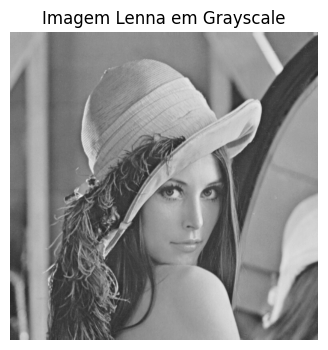

In [ ]:
import cv2

lenna_gray = cv2.imread('data/lenna.png', cv2.IMREAD_GRAYSCALE)

show_image(lenna_gray, title='Imagem Lenna em Grayscale')

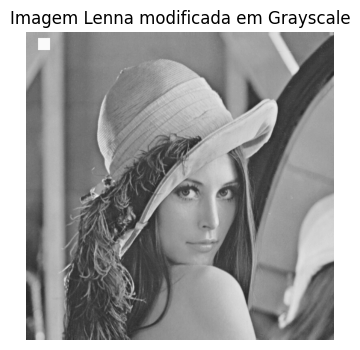

In [ ]:
lenna_gray_modificada = lenna_gray.copy()  # Create a copy to avoid modifying the original
lenna_gray_modificada[10:30, 20:40] = 250  # Modify the specific region of the copy
show_image(lenna_gray_modificada, title='Imagem Lenna modificada em Grayscale')

#### Histograma
Com o histograma podemos visualizar a frequ√™ncia de cada intensidade de cor nos pixels da imagem

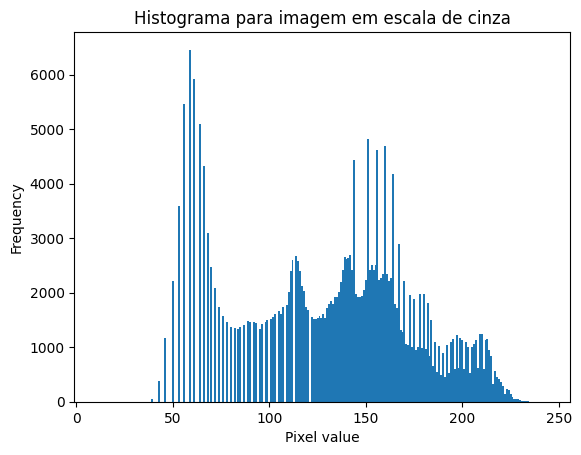

In [ ]:
# Definindo uma fun√ß√£o para plotar o histograma de uma imagem
def plot_histogram_gray(image, title='Histograma para imagem em escala de cinza'):
    # Calculando o histograma
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plotando o histograma
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.bar(range(256), histogram.flatten(), width=1)
    plt.xlim([-1, 256])
    plt.show()


plot_histogram_gray(lenna_gray)

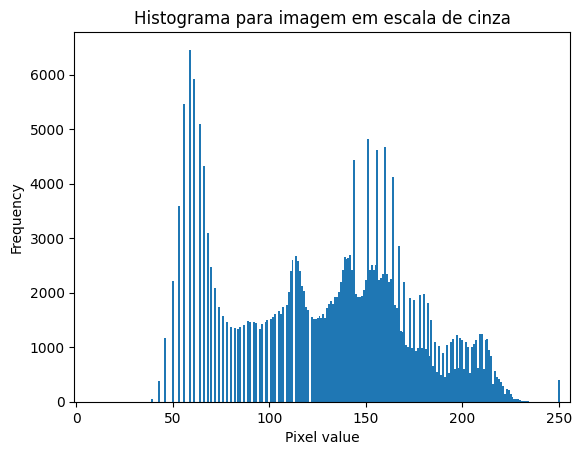

In [ ]:
# Definindo uma fun√ß√£o para plotar o histograma de uma imagem
def plot_histogram_gray(image, title='Histograma para imagem em escala de cinza'):
    # Calculando o histograma
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plotando o histograma
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.bar(range(256), histogram.flatten(), width=1)
    plt.xlim([-1, 256])
    plt.show()


plot_histogram_gray(lenna_gray_modificada)

### Carregando Imagens Coloridas
Vamos carregar a mesma imagem em cores (RGB). Em imagens RGB, cada pixel √© representado por tr√™s valores que correspondem √†s intensidades das cores vermelho, verde e azul.

Shape: (512, 512, 3)


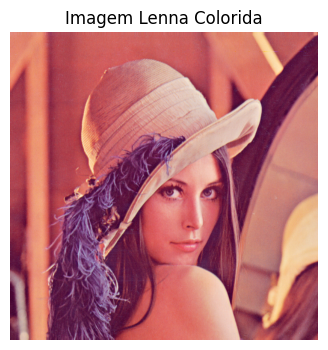

In [ ]:
lenna_color = cv2.imread('data/lenna.png')
lenna_color = cv2.cvtColor(lenna_color, cv2.COLOR_BGR2RGB)

print("Shape:", lenna_color.shape)

show_image(lenna_color, title='Imagem Lenna Colorida')

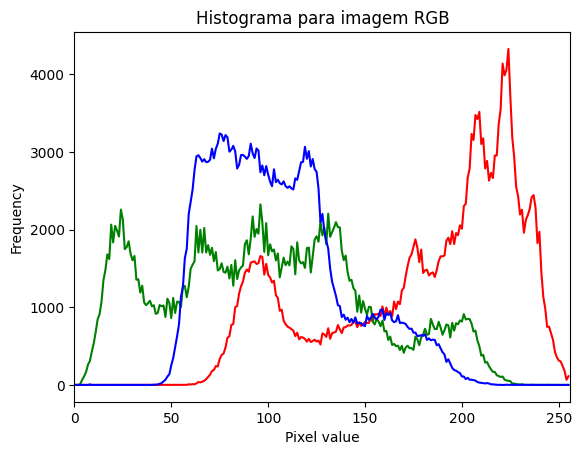

In [ ]:
# Definindo uma fun√ß√£o para plotar histogramas para imagens RGB
def plot_histogram_rgb(image, title='Histograma para imagem RGB'):
    colors = ('r', 'g', 'b')
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')

    for i, color in enumerate(colors):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=color)
        plt.xlim([0, 256])

    plt.show()


plot_histogram_rgb(lenna_color)

### Explorando os Canais de Cor RGB
Vamos separar os canais de cor (R, G, B) da imagem colorida e visualiz√°-los individualmente. Cada canal √© uma imagem em escala de cinza que representa a intensidade da respectiva cor em cada pixel.

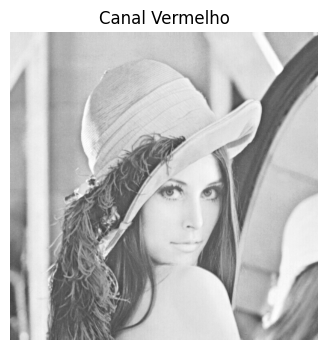

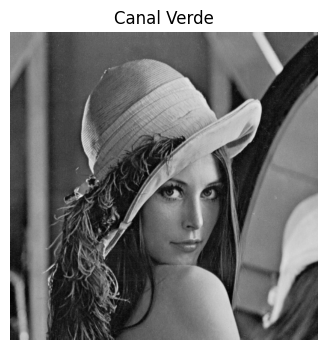

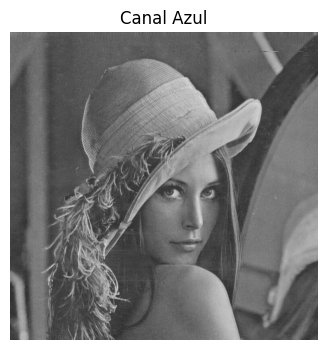

In [ ]:
r = lenna_color[:, :, 0]
g = lenna_color[:, :, 1]
b = lenna_color[:, :, 2]

show_image(r, title='Canal Vermelho')
show_image(g, title='Canal Verde')
show_image(b, title='Canal Azul')

### Editando Canais de Cor e Combinando
Vamos desenhar c√≠rculos em cada canal de cor da imagem Lenna. Esses c√≠rculos se sobrepor√£o em algumas partes, criando diferentes cores na imagem final combinada.

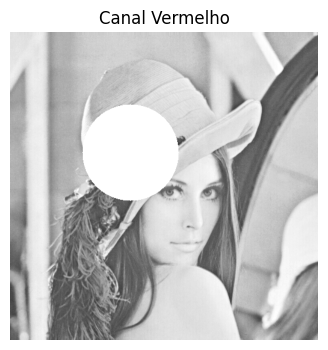

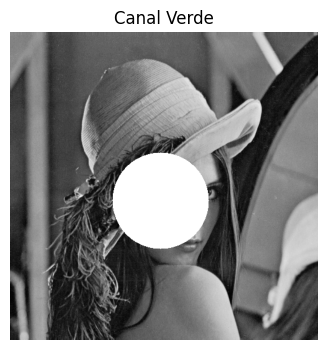

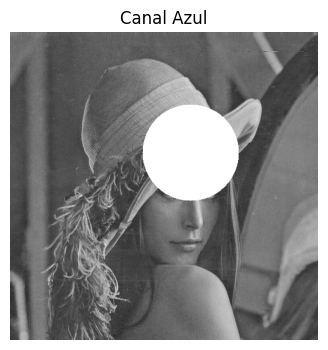

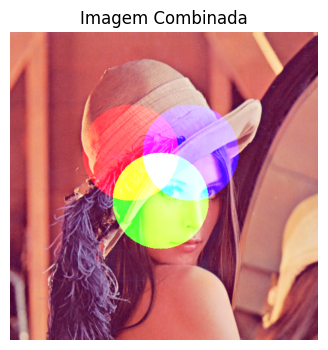

In [ ]:
def draw_circle(image, center, radius, intensity):
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
                image[y, x] = intensity
    return image

# Desenhando c√≠rculos nos canais
r_circle = draw_circle(r.copy(), (200, 200), 80, 255)
g_circle = draw_circle(g.copy(), (250, 280), 80, 255)
b_circle = draw_circle(b.copy(), (300, 200), 80, 255)

show_image(r_circle, title='Canal Vermelho')
show_image(g_circle, title='Canal Verde')
show_image(b_circle, title='Canal Azul')

# Combinando os canais
combined_image = np.stack([r_circle, g_circle, b_circle], axis=-1)
show_image(combined_image, title='Imagem Combinada')

## Exerc√≠cios
Agora √© sua vez!

### Exerc√≠cio 1
Usando apenas manipula√ß√£o de matrizes (sem o aux√≠lio do OpenCV), converta a imagem contida na vari√°vel `lenna_color` para escala de cinza e em seguida plote a imagem convertida e o histograma do resultado.

F√≥rmula de Luminosidade:

A f√≥rmula combina os canais de cor (R, G, B) com pesos espec√≠ficos para calcular a intensidade de cinza percebida:

valor_cinza
= 0.299 x ùëÖ + 0.587 x ùê∫ + 0.114 x ùêµ

In [ ]:
lenna_color2 = cv2.imread('data/lenna.png')
lenna_color2 = cv2.cvtColor(lenna_color2, cv2.COLOR_BGR2RGB)

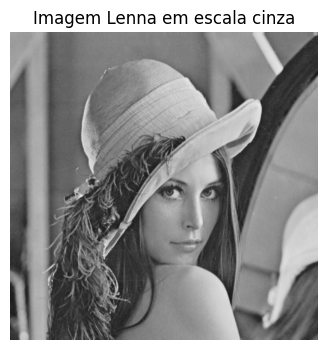

In [ ]:
for y in range(lenna_color2.shape[0]):
    for x in range(lenna_color2.shape[1]):
            r = lenna_color2[y, x, 0]  # Acessa os valores individuais dos pixels
            g = lenna_color2[y, x, 1]
            b = lenna_color2[y, x, 2]
            valor_cinza = (0.299 * r + 0.587 * g + 0.114 * b)
            lenna_color2[y, x] = valor_cinza

lenna_gray1 = lenna_color2
# Exibir o resultado
show_image(lenna_gray1, title='Imagem Lenna em escala cinza')

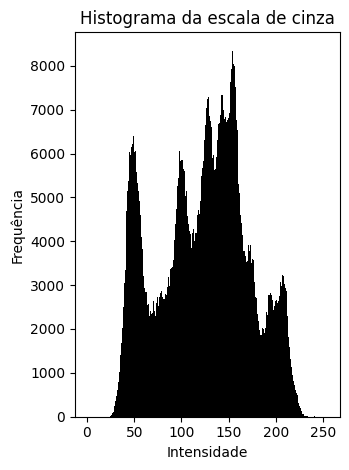

In [ ]:
# Histograma da escala de cinza
plt.subplot(1, 2, 2)
plt.hist(lenna_color2.ravel(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da escala de cinza")
plt.xlabel("Intensidade")
plt.ylabel("Frequ√™ncia")

plt.tight_layout()
plt.show()

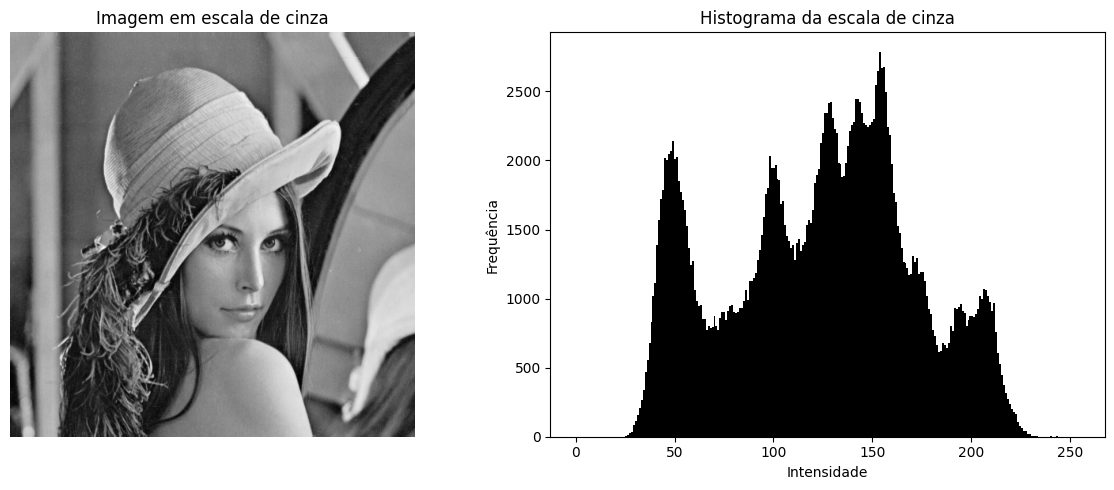

In [ ]:
# lenna_color est√° no formato uint8, normalizar para [0, 1] para c√°lculos
lenna_color = lenna_color / 255.0 if lenna_color.max() > 1 else lenna_color

# Converter para escala de cinza usando os pesos padr√£o de luminosidade
weights = np.array([0.2989, 0.5870, 0.1140])  # Pesos para R, G, B
lenna_gray = np.dot(lenna_color[..., :3], weights)

# Se necess√°rio, volte ao intervalo [0, 255]
lenna_gray = (lenna_gray * 255).astype(np.uint8)

# Plotar a imagem convertida para escala de cinza
plt.figure(figsize=(12, 5))

# Imagem em escala de cinza
plt.subplot(1, 2, 1)
plt.imshow(lenna_gray, cmap='gray')
plt.title("Imagem em escala de cinza")
plt.axis('off')

# Histograma da escala de cinza
plt.subplot(1, 2, 2)
plt.hist(lenna_gray.ravel(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da escala de cinza")
plt.xlabel("Intensidade")
plt.ylabel("Frequ√™ncia")

plt.tight_layout()
plt.show()


### Exerc√≠cio 2
Usando apenas manipula√ß√£o de matrizes (sem o aux√≠lio do OpenCV), binarize a imagem em escala de cinza obtida no exerc√≠cio anterior. Fa√ßa 3 varia√ß√µes variando o threshold.

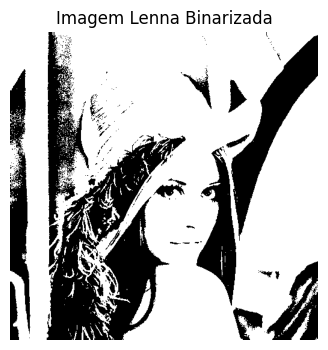

In [ ]:
# Criar matriz para armazenar imagem binarizada
lenna_threshold = np.zeros((512, 512), dtype=np.uint8)

# Aplicar a binariza√ß√£o diretamente
for y in range(512):
    for x in range(512):
        if lenna_gray[y, x] > 100:  # Comparar diretamente com o threshold
            lenna_threshold[y, x] = 255

# Exibir o resultado
show_image(lenna_threshold, title='Imagem Lenna Binarizada')


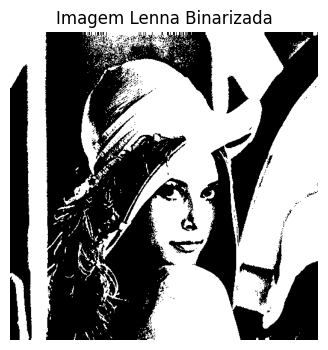

In [ ]:
lenna_threshold = np.zeros((512, 512))

threshold = 130

for y in range(512):
    for x in range(512):
      pixels = lenna_gray1[y,x]
      if np.any(pixels >= threshold):
          lenna_threshold[y, x] = 255


show_image(lenna_threshold, title='Imagem Lenna Binarizada')

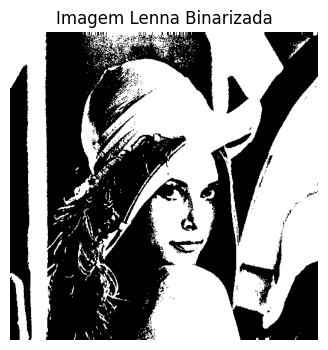

In [ ]:
lenna_threshold = np.zeros((512, 512))

threshold = 130

for y in range(512):
    for x in range(512):
      pixels = lenna_gray[y,x]
      if pixels >= threshold:
          lenna_threshold[y, x] = 255


show_image(lenna_threshold, title='Imagem Lenna Binarizada')

## Resolvendo os exerc√≠cios de outra forma usando as bibliotecas PIL e IPython.display

**Etapas do Projeto**

1. Carregando a Imagem
Para come√ßar, utilizamos uma imagem colorida carregada diretamente do Google Drive em um ambiente Google Colab. Essa imagem serviu como base para as transforma√ß√µes subsequentes.

In [ ]:
from PIL import Image

In [ ]:
caminho_imagem = 'data/lenna.png'
lenna_original = Image.open(caminho_imagem)

Se for usar imagens que est√£o no Google Drive fa√ßa assim:

from google.colab import drive

drive.mount('/content/drive')

caminho_imagem = "/content/drive/My Drive/maltese-1123016_1280.jpg"

imagem_original = Image.open(caminho_imagem)

2. Convers√£o para Tons de Cinza

A convers√£o para tons de cinza reduz os tr√™s canais RGB para um √∫nico canal de intensidade, simplificando os dados da imagem.
Cada pixel foi processado individualmente. Abaixo est√° a implementa√ß√£o:

In [ ]:
def converter_para_cinza(imagem):

  largura, altura = imagem.size
  imagem_cinza = Image.new("L", (largura, altura))  # Escala de cinza

  for y in range(altura):
      for x in range(largura):
          r, g, b = imagem.getpixel((x, y))
          valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
          imagem_cinza.putpixel((x, y), valor_cinza)

  return imagem_cinza

3. Binariza√ß√£o (Preto e Branco)

Na binariza√ß√£o, os pixels s√£o convertidos para apenas dois valores: preto (0) ou branco (255). A decis√£o √© baseada em um limiar (threshold), que define o valor de corte:

Se o pixel for maior que o limiar, torna-se branco.
Caso contr√°rio, torna-se preto.
A implementa√ß√£o √© a seguinte:

In [ ]:
def binarizar_imagem(imagem_cinza, limiar=127):
  largura, altura = imagem_cinza.size
  imagem_binaria = Image.new("1", (largura, altura))  # Bin√°ria

  for y in range(altura):
      for x in range(largura):
          valor_cinza = imagem_cinza.getpixel((x, y))
          valor_binario = 1 if valor_cinza > limiar else 0
          imagem_binaria.putpixel((x, y), valor_binario)

  return imagem_binaria

4. Exibi√ß√£o das Imagens

No Google Colab, utilizamos o m√©todo display da biblioteca IPython.display para exibir as imagens diretamente no notebook.

In [ ]:
from IPython.display import display

In [ ]:
# Converter a imagem para cinza
lenna_cinza = converter_para_cinza(lenna_original)

# Binarizar a imagem
lenna_binaria = binarizar_imagem(lenna_cinza, limiar=123)


Resultados

A partir da imagem colorida original, geramos as seguintes transforma√ß√µes:

Imagem Original:


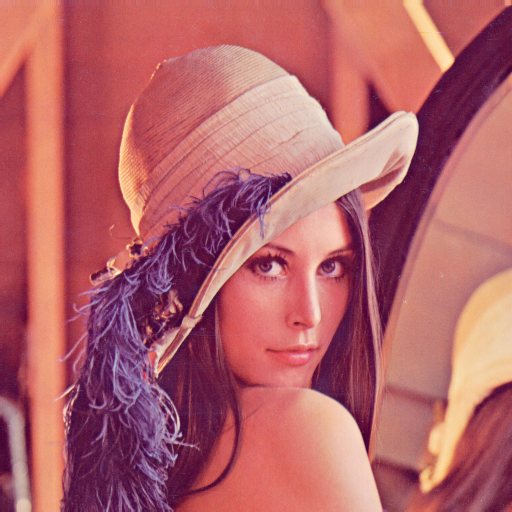

In [ ]:
# Exibir as imagens processadas
print("Imagem Original:")
display(lenna_original)


Imagem em Tons de Cinza:


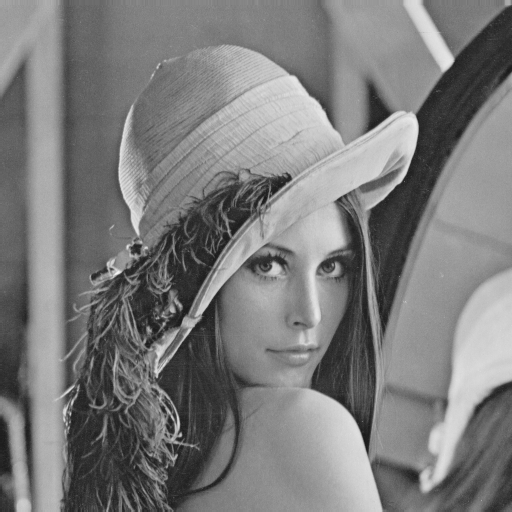

In [ ]:
print("Imagem em Tons de Cinza:")
display(lenna_cinza)

Imagem Binarizada:


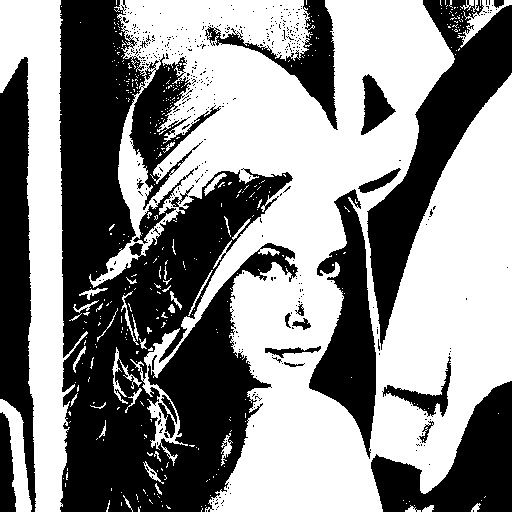

In [ ]:
print("Imagem Binarizada:")
display(lenna_binaria)